# Data Science Blog Post

https://vasildatascience.wordpress.com


CRISP-DM Process (Cross Industry Process for Data Mining)

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

## The first two steps of CRISP-DM

### 1. Business Understanding

What problem we are trying to solve and what questtions we will answer. Here is what we will try to achive.

We will get hands on practice with few datasets from www.kaggle.com. By looking at the columns we can get tons of questions. I will go over 3 question and find the answers using CRISP-DM Process. The same process should be able to answer more questions. 

**<font color='red'>Question1: </font>Where is more expensive - Boston or Seattle to have a vacation**

**<font color='red'>Question2: </font>What are the busiest days and what time is best to go - more rental options**

**<font color='red'>Question3: </font>Will my dates affect the rental price**

### 2. Data Understanding

After Business Understanding we need to move to the data. We might need to collect or already have it collected. The data is alredy presented in our case and we will just use it for our analysys.

Datasets used:

**Boston, MA, USA Airbnb Open Data** - listing activity of homestays in Boston, MA. You can find the datasets used from the following link:  https://www.kaggle.com/airbnb/boston

**Seattle, WA, USA  Airbnb Open Data** - listing activity of homestays in Seattle, WA. You can find the datasets used from the following link: https://www.kaggle.com/airbnb/seattle/


 Information about the datasets:
 - Calendar (calendar.csv) -  includes listing id and the price and availability for that day
 - Listings (listings.csv) - includes full descriptions and average review score
 - Reviews (reviews.csv) - includes unique id for each reviewer and detailed comments 


#### First we will import the necessary libraries. Always put this on the top fo your code/file. For more information: https://docs.python.org/3/faq/programming.html#what-are-the-best-practices-for-using-import-in-a-module 

In [29]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#### Let's read in the data

In [20]:
#Loading Boston Datasets
df_b_cal = pd.read_csv('./boston/calendar.csv')
df_b_list = pd.read_csv('./boston/listings.csv')
df_b_rev = pd.read_csv('./boston/reviews.csv')

In [21]:
#Loading Seattle Datasets
df_s_cal = pd.read_csv('./seattle/calendar.csv')
df_s_list = pd.read_csv('./seattle/listings.csv')
df_s_rev = pd.read_csv('./seattle/reviews.csv')

Lets use Pandas head() function to virify first 5 rows for the object based on position. It will help for quickly testing and if we have the right type of data.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.head.html

In [22]:
#Boston data verification  - calendar.csv
df_b_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [23]:
#Boston data verification - listings.csv
df_b_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [24]:
#Boston data verification - reviews.csv
df_b_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [25]:
#Seattle data verification  - calendar.csv

df_s_cal.head().head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [26]:
#Seattle data verification - listings.csv
df_s_list.head().head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [27]:
#Boston data verification - reviews.csv
df_s_rev.head().head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Let's find the number of rows and columns in each dataset

In [47]:
datasets = [df_b_cal, df_b_list, df_b_rev, df_s_cal, df_s_list, df_s_rev]

for i in datasets:
    print("Dataset:", [x for x in globals() if globals()[x] is i][0]) #Name of the dataset
    print("Number of rows in the dataset:",i.shape[0]) #Number of rows in the dataset
    print("Number of columns in the dataset:",i.shape[1]) #Number of columns in the dataset
    print('\n')


Dataset: df_b_cal
Number of rows in the dataset: 1308890
Number of columns in the dataset: 4


Dataset: df_b_list
Number of rows in the dataset: 3585
Number of columns in the dataset: 95


Dataset: df_b_rev
Number of rows in the dataset: 68275
Number of columns in the dataset: 6


Dataset: df_s_cal
Number of rows in the dataset: 1393570
Number of columns in the dataset: 4


Dataset: df_s_list
Number of rows in the dataset: 3818
Number of columns in the dataset: 92


Dataset: df_s_rev
Number of rows in the dataset: 84849
Number of columns in the dataset: 6




#### From the output above we see that in the Listings datasets for Boston and Seattle there are  differents in the columns. Let's find out what are the differences.

In [114]:
#Obtain all the column names in Boston Listings dataset
list_b_columns = list(df_b_list.columns.values)

In [115]:
#Obtain all the column names in Seattle Listings dataset
list_s_columns = list(df_s_list.columns.values)

In [121]:
#Find the delta  in the columns

col_diff = [i for i in list_b_columns if i not in list_s_columns]
 
print(col_diff) 

['access', 'interaction', 'house_rules']


#### Which columns are without missing values? 

In [137]:
no_nulls = set(df_s_cal.columns[df_s_cal.isnull().mean() == 0])#Provide a set of columns with 0 missing values.
no_nulls 

{'available', 'date', 'listing_id'}

#### Which columns are with the most missing values? 

In [130]:
tet = df_s_rev.isnull().mean().sort_values(ascending = False)

tet

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

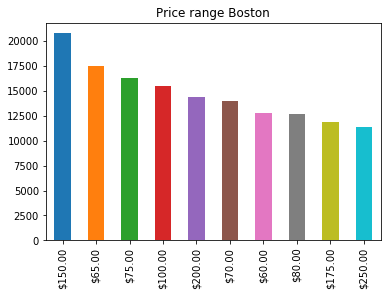

In [155]:
price10_b = df_b_cal.price.value_counts().head(10)
price10_b.plot(kind="bar");
plt.title("Price range Boston");

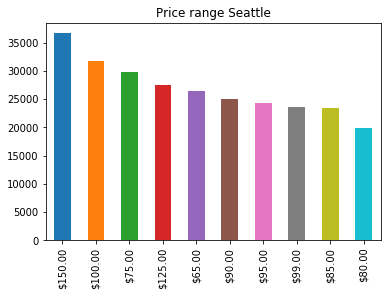

In [158]:
price10_s = df_s_cal.price.value_counts().head(10)
price10_s.plot(kind="bar");
plt.title("Price range Seattle");

In [159]:
df_s_cal.select_dtypes(exclude=['int', 'float']).columns

Index(['date', 'available', 'price'], dtype='object')

In [160]:
df_s_cal.select_dtypes(include=['category', object]).columns


Index(['date', 'available', 'price'], dtype='object')

In [161]:
#test

NameError: name 'test' is not defined